# Idade Penal: Tabela comparativa

Import all the dependencies.

In [2]:
%matplotlib inline

import urllib
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

Load the page where the data will be fetched:

**url**: http://www.crianca.mppr.mp.br/modules/conteudo/conteudo.php?conteudo=323

In [3]:
response = urllib.request.urlopen('http://www.crianca.mppr.mp.br/modules/conteudo/conteudo.php?conteudo=323')
html = response.read()

Parse the html from the page and put into some structured data.

In [4]:
soup = BeautifulSoup(html, 'html.parser')
table_lines = list(soup.body.table.find_all('tr'))

In [5]:
Entry = namedtuple('Entry', ['country',
                             'r_juvenil_str', 'r_adulto_str',
                             'r_juvenil_min', 'r_adulto_min',
                             'r_juvenil_max', 'r_adulto_max'])

def data_str_to_num(dstr, is_min):
    return int(dstr.split('/')[0 if is_min else -1])

def tr_to_entry(tr):
    tds = tr.find_all('td')
    return Entry(
        tds[0].contents[0],
        tds[1].contents[0],
        tds[2].contents[0],
        data_str_to_num(tds[1].contents[0], True),
        data_str_to_num(tds[2].contents[0], True),
        data_str_to_num(tds[1].contents[0], False),
        data_str_to_num(tds[2].contents[0], False),
    )

cleaned_data = list(map(tr_to_entry, table_lines[1:]))
# Python's sort is stable ;P
cleaned_data = sorted(cleaned_data, key=lambda it: it.country)
cleaned_data = sorted(cleaned_data, key=lambda it: it.r_juvenil_min)
cleaned_data = sorted(cleaned_data, key=lambda it: it.r_adulto_min);

Prepare the data for the graph and plot it.

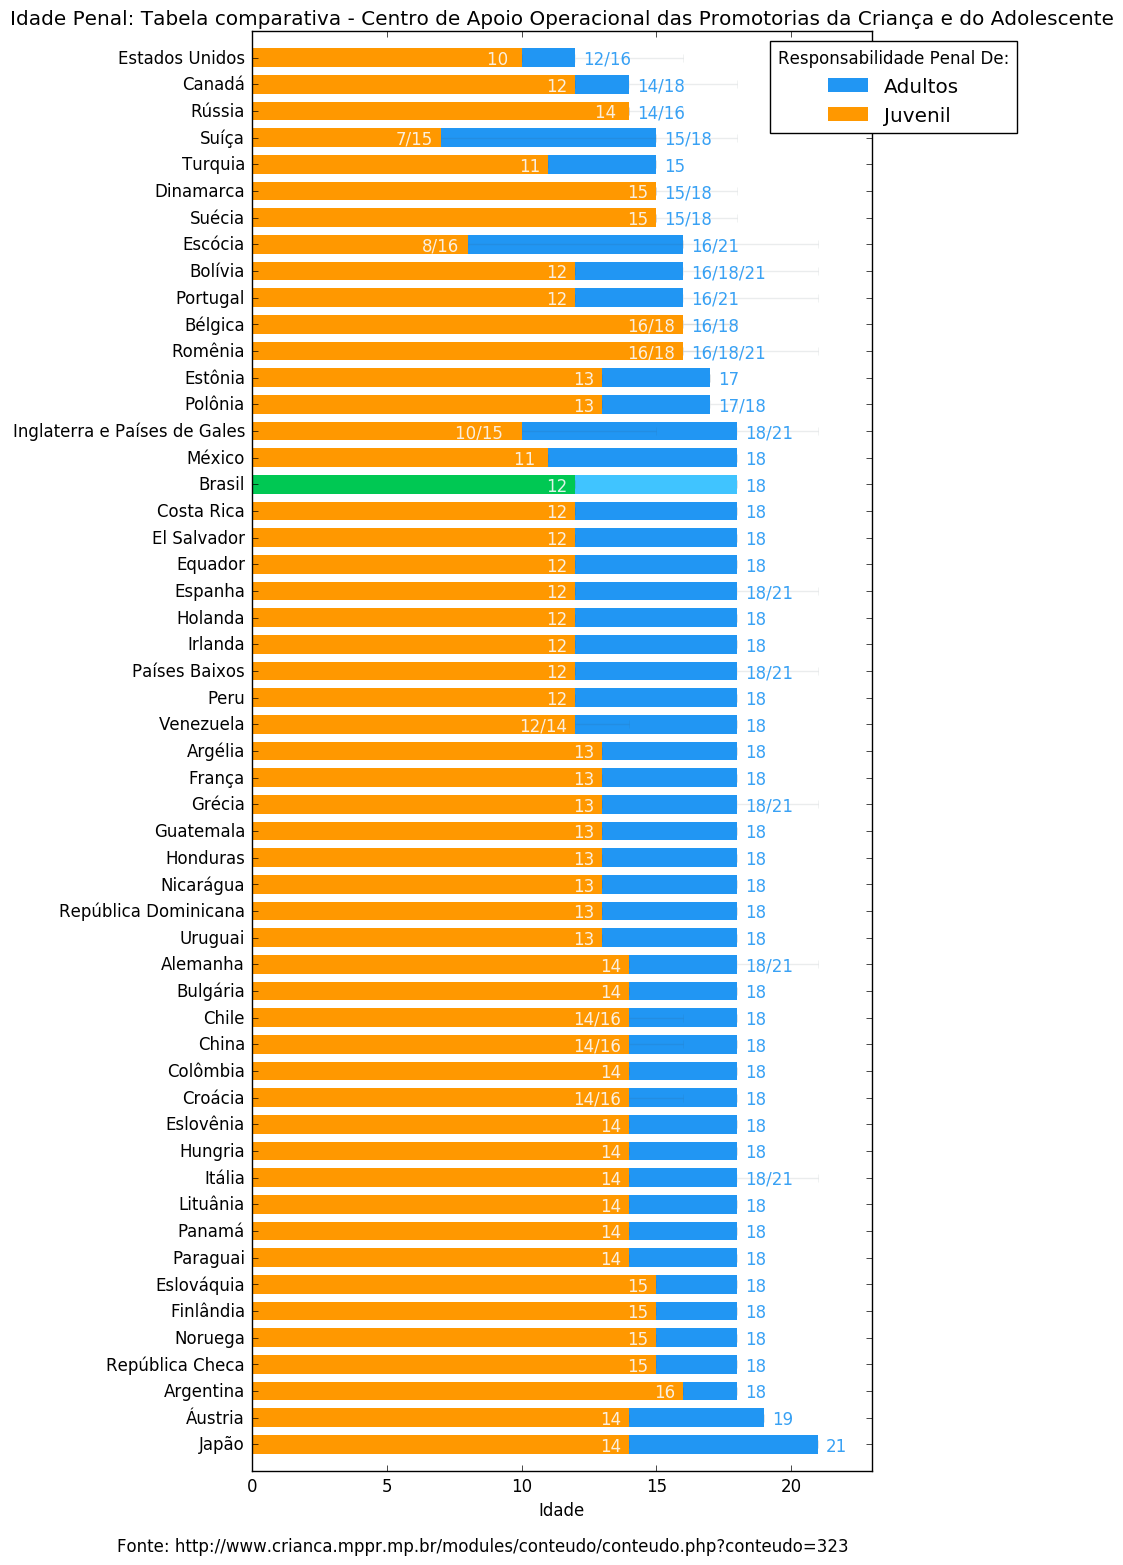

In [45]:
height = 0.7
# Graph's data
flatmap = lambda it: [x for i in it for x in i]
juvenil_y_pos = np.arange(len(cleaned_data))[::-1]
juvenil_x_pos = list(map(lambda it: it.r_juvenil_min, cleaned_data))
juvenil_y_error = [list(map(lambda it: 0, cleaned_data)),
                   list(map(lambda it: it.r_juvenil_max-it.r_juvenil_min, cleaned_data))]
adulto_y_pos = juvenil_y_pos
adulto_x_pos = list(map(lambda it: it.r_adulto_min, cleaned_data))
adulto_y_error = [list(map(lambda it: 0, cleaned_data)),
                   list(map(lambda it: it.r_adulto_max-it.r_adulto_min, cleaned_data))]


# Graph painting stuff
plt.rcdefaults()
plt.rcParams['figure.figsize'] = [8,18]
error_kw={'alpha': 0.1, 'ecolor': '#37474F'}
adulto_bars = plt.barh(adulto_y_pos, adulto_x_pos,  xerr=adulto_y_error,
                       height=height, align='center',
                       color='#2196F3', edgecolor='none',
                       error_kw=error_kw)
juvenil_bars = plt.barh(juvenil_y_pos, juvenil_x_pos, xerr=juvenil_y_error,
                        height=height, align='center',
                        color='#FF9800', edgecolor='none',
                        error_kw=error_kw)
fig = plt.gcf()
fig.set_facecolor('white')
axes = plt.gca()
axes.tick_params(axis='y', pad=5)
axes.set_ylim([-1, len(cleaned_data)])
axes.set_xlim([0, max([x.r_adulto_min for x in cleaned_data]) + 2])
axes.legend((adulto_bars[0], juvenil_bars[0]), ('Adultos', 'Juvenil'), title='Responsabilidade Penal De:', loc='upper right', bbox_to_anchor=(1.25,1))
y_labels = list(map(lambda it: it.country, cleaned_data))
plt.yticks(juvenil_y_pos, y_labels)
plt.xlabel('Idade')
plt.title(soup.title.string)

# Print the original value text besides each bar
def print_text_label(text_gen, color, width_offset, ha, bars):
    for (idx, bar) in zip(range(len(bars)), bars):
        plt.text(bar.get_x() + bar.get_width() + width_offset,
                 bar.get_y() + 0.3,
                 text_gen(idx),
                 color=color,
                 ha=ha, va='center', alpha=0.9)

print_text_label(lambda idx: cleaned_data[idx].r_juvenil_str, '#FAFAFA', -0.3, 'right', juvenil_bars)
print_text_label(lambda idx: cleaned_data[idx].r_adulto_str, '#2196F3', +0.3, 'left', adulto_bars)

# Highlight Brasil ^^
br_idx = next((i for i,v in enumerate(cleaned_data) if v.country == 'Brasil'))
axes.patches[br_idx + len(cleaned_data)].set_facecolor('#00C853')
axes.patches[br_idx].set_facecolor('#40C4FF')

# Sauce
plt.text(-5, -4, 'Fonte: http://www.crianca.mppr.mp.br/modules/conteudo/conteudo.php?conteudo=323');

plt.show();

Source at: http://github.com/AranHase/stats_idade_penal